# Thông tin sinh viên
* MSSV: 20522012
* Họ và tên: Phạm Trần Anh Tiên
* Bài tập 6
* Ngày thực hiện: 29/3/2022

# Kết nối đến Google Drive và cài đặt một số thư viện cần thiết

In [163]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from skfuzzy.cluster import cmeans
from fcmeans import FCM

# Các hàm phụ trợ

In [164]:
def drawHist(x):
    hist = cv2.calcHist([x], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()

def globalThresholding(img, thres=127):
    img_rst = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img_rst[i,j] < thres:
                img_rst[i,j] = 255
            else:
                img_rst[i,j] = 0
    return img_rst

def adaptiveThresholding(f, nrow, ncol):
    g = f.copy()
    r = int(f.shape[0] / nrow)
    c = int(f.shape[1] / ncol)
    for i in range(int(nrow)):
        for j in range(int(ncol)):
            x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
            cv2_imshow(x)
            drawHist(x)
            #t = np.average(x)
            t = int(input())
            g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
    return g


def Kmeans(img, n_clusters = 6):
    nrow, ncol,nchl = img.shape
    g = img.reshape(nrow*ncol,nchl)
    k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)

    t = k_means.cluster_centers_[k_means.labels_]
    img_res = t.reshape(nrow, ncol, nchl)
    return img_res


def Kmeans2(img, n_clusters = 6):
    img_tmp = img.copy()
    nrow, ncol,nchl = img.shape
    g = []
    for y in range(nrow):
        for x in range(ncol):
            tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
            g.append(tmp)

    k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    # t = k_means.cluster_centers_[k_means.labels_]
    arrcolor = np.random.rand(20,3) * 255
    t = arrcolor[k_means.labels_]
    img_res = img_tmp
    i = 0

    for y in range(nrow):
        for x in range(ncol):
            img_res[y, x] = t[i][0:3]
            i += 1
    return img_res

def ABC(img, n_clusters=6, opt=0):
    nrow, ncol, nchl = img.shape
    g = img.reshape(nrow*ncol,nchl)
    
    if opt == 0:
        res = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)
        t = res.cluster_centers_[res.labels_]
    elif opt == 1:
        bandwidth = estimate_bandwidth(g)
        res = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(g)
        t = res.cluster_centers_[res.labels_]
    elif opt == 2:
        g = np.array(g)
        fcm = FCM(n_clusters=n_clusters)
        fcm.fit(g)

        labels = fcm.predict(g)

        arrcolor = np.random.rand(20,3) * 255
        t = arrcolor[labels]
        i = 0
        img_res = img.copy()
        for y in range(nrow):
            for x in range(ncol):
                img_res[y, x] = t[i][0:3]
                i += 1

    img_res = t.reshape(nrow, ncol, nchl)
    return img_res


def plotting_gray(img, res):
    plt.figure(figsize=(15,10))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(res, cmap='gray')
    plt.axis('off')

def plotting_rgb(img, res):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,10))
    plt.subplot(121)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(res)
    plt.axis('off')

# Đọc dữ liệu

In [165]:
IMAGES_DIR = '/content/drive/MyDrive/CS231.M22.KHCL/Baitap/Baitap5/images'

In [166]:
particles = cv2.imread(os.path.join(IMAGES_DIR, 'particles.bmp'), 0)
phandoan01 = cv2.imread(os.path.join(IMAGES_DIR, 'Phandoan01.jpg'), 0)
wdg2 = cv2.imread(os.path.join(IMAGES_DIR, 'wdg2.jpg'), 0)
rice = cv2.imread(os.path.join(IMAGES_DIR, 'rice.png'), 0)

wdg3 = cv2.imread(os.path.join(IMAGES_DIR, 'wdg3.jpg'), 0)

# Global Thresholding

In [ ]:
res = globalThresholding(particles, thres=127)
plotting_gray(particles, res)

In [ ]:
res = globalThresholding(phandoan01, thres=85)
plotting_gray(phandoan01, res)

In [ ]:
res = globalThresholding(wdg2, thres=127)
plotting_gray(wdg2, res)

In [ ]:
res = globalThresholding(rice, thres=120)
plotting_gray(rice, 255-res)

# Adaptive Thresholding

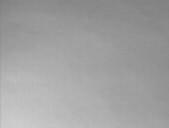

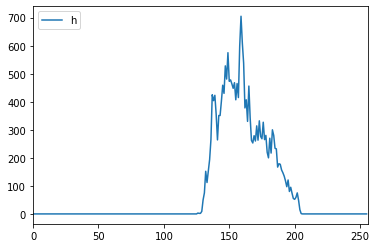

KeyboardInterrupt: ignored

In [ ]:
cv2_imshow(adaptiveThresholding(wdg3, nrow=3, ncol=3))

# K-means on image pixels

## K-MEAN 1

In [ ]:
vegetable = '/content/drive/MyDrive/CS231.M22.KHCL/Baitap/Baitap5/images/vegetables.jpg'


img = cv2.imread(vegetable)

img_res = Kmeans(img, n_clusters=6)
img_res = Kmeans2(img, n_clusters=6)
img_res = img_res.astype('uint8')
plotting_rgb(img, img_res)

In [ ]:
hand = '/content/drive/MyDrive/CS231.M22.KHCL/Baitap/Baitap5/images/hand.jpg'
img = cv2.imread(hand)
img_res = Kmeans(img, n_clusters=4)
img_res = img_res.astype('uint8')
plotting_rgb(img, img_res)

In [ ]:
thuoc = '/content/drive/MyDrive/CS231.M22.KHCL/Baitap/Baitap5/images/thuoc.jpg'
img = cv2.imread(thuoc)
img_res = Kmeans(img, n_clusters=6)
img_res = img_res.astype('uint8')
plotting_rgb(img, img_res)

## K-MEAN 2

In [ ]:
img = cv2.imread(vegetable)
img_res = Kmeans2(img, n_clusters=12)
img_res = img_res.astype('uint8')
plotting_rgb(img, img_res)

In [ ]:
img = cv2.imread(thuoc)
img_res = Kmeans2(img, n_clusters=12)
img_res = img_res.astype('uint8')
plotting_rgb(img, img_res)



# YÊU CẦU 1: K-MEANS, MEANSHIFT, FCM

In [ ]:
img = cv2.imread(thuoc)
img_res = ABC(img, n_clusters=6, opt=0)
img_res = img_res.astype('uint8')
plotting_rgb(img, img_res)

In [ ]:
img = cv2.imread(thuoc)
img_res = ABC(img, n_clusters=6, opt=1)
img_res = img_res.astype('uint8')
plotting_rgb(img, img_res)

In [ ]:
img = cv2.imread(thuoc)
img_res = ABC(img, n_clusters=6, opt=2)
img_res = img_res2.astype('uint8')
plotting_rgb(img, img_res)

# YÊU CẦU 2: GRABCUT

In [ ]:
def GraphSeg(path_filename, x, y, w, h):
    img = cv2.imread(path_filename)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = np.zeros(img.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    rectangle = (x, y, w, h)
    cv2.grabCut(img, mask, rectangle,
                backgroundModel, foregroundModel,
                5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    res = img * mask2[:, :, np.newaxis]

    plotting_rgb(img, res)

In [ ]:
path_messi = '/content/drive/MyDrive/CS231.M22.KHCL/Baitap/Baitap6/images/Lionel-Messi.jpg'
GraphSeg(path_messi, 225,25,240,400)

In [ ]:
dogcat_path = '/content/drive/MyDrive/CS231.M22.KHCL/Baitap/Baitap6/images/dogcat.jpg'
GraphSeg(dogcat_path, 10,12,140,165)